# Hypotheses Correlation Analysis

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
import re

In [ ]:
# Importing full data
full_df = pd.read_csv('full_df.csv')
# full_df.head()
full_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age,property_type_encoded,has_ctilt
0,0,451165,Retail,12808,46123.0,2,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,1.0,4.0,NaN,3,0
1,1,350106,Retail,10958,43055.0,2,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1.0,1.0,NaN,3,0
2,2,384179,Retail,13,46360.0,2,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1.0,1.0,NaN,3,0
3,3,402102,Retail,82,6902.0,1,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1.0,1.0,NaN,3,0
4,4,417214,Retail,11204,44062.0,2,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1.0,1.0,NaN,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,Office,59710,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,10.0,NaN,1,0
5534,5971,615825,Office,5650,89523.0,2,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,1.0,3.0,NaN,1,1
5535,5972,618912,Office,59178,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,12.0,36.0,1,0
5536,5973,558027,Industrial,10500,95370.0,2,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,1.0,0.0,NaN,0,0


In [ ]:
# Splitting by property type for hypotheses
# Residential
residential = full_df[full_df['property_type'] == 'Residential']
# Retail
retail = full_df[full_df['property_type'] == 'Retail']
# Office
office = full_df[full_df['property_type'] == 'Office']
# Industrial 
industrial = full_df[full_df['property_type'] == 'Industrial']

### Residential Variables

In [ ]:
residential_num_floors_df = residential[['project_id', 'num_floors']]
residential_num_floors_df

,project_id,num_floors
1454,460196,1.0
1908,409310,4.0
2148,471523,5.0
2177,423514,7.0
2410,351631,5.0
2503,395823,3.0
2676,423515,8.0
3518,381564,4.0
4511,409000,6.0
4816,408998,10.0


Seems there are only 10 residential properties in the dataset, which isn't large enough for any correlation testing.

### Identifying Office Variables

- Predictors: sqft, zip code

- Response: Wood frame, Glu-lam Structural Components

In [ ]:
office_df = office[['project_id', 'sqft', 'zip', 'region', 'has_wood_frame', 'has_glu']]
office_df

,project_id,sqft,zip,region,has_wood_frame,has_glu
1423,622922,10800,80514.0,2,0,0
1424,622559,51201,30097.0,3,0,0
1429,622560,62131,30097.0,3,0,0
1431,624073,39800,98032.0,2,0,0
1433,622558,56747,30097.0,3,0,0
...,...,...,...,...,...,...
5527,484060,10272,95124.0,2,1,0
5528,536261,95816,20910.0,1,0,0
5533,618913,59710,27517.0,3,0,0
5534,615825,5650,89523.0,2,0,0


### Sqft and wood frame

Finding correlation with Pearson Correlation Coefficient

In [ ]:
# Pearson correlation coefficient calculation
correlation = office_df['sqft'].corr(office_df['has_wood_frame'])

print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: -0.1441340145638495


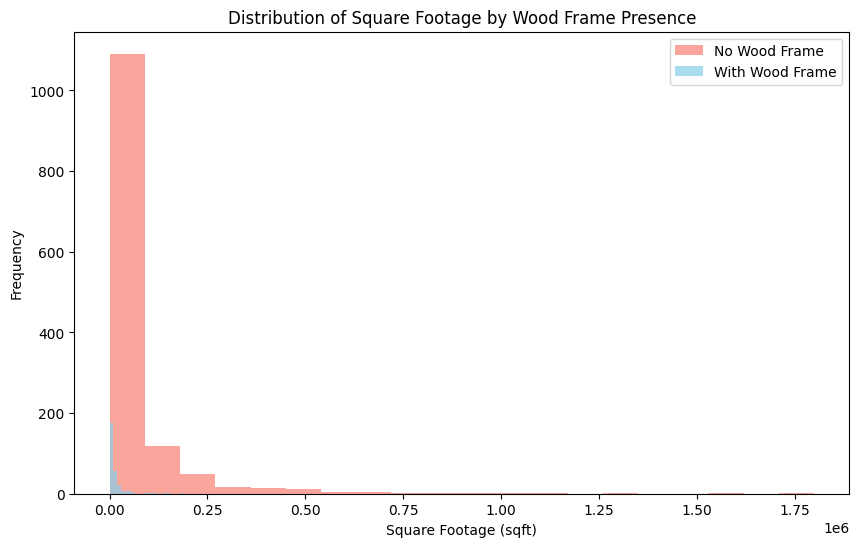

In [ ]:
# Step 1: Split the data into two groups based on the presence of wood frames
wood_frame_group = office_df[office_df['has_wood_frame'] == 1]
no_wood_frame_group = office_df[office_df['has_wood_frame'] == 0]

# Step 2: Plot histograms for each group
plt.figure(figsize=(10, 6))

plt.hist(no_wood_frame_group['sqft'], bins=20, color='salmon', alpha=0.7, label='No Wood Frame')
plt.hist(wood_frame_group['sqft'], bins=20, color='skyblue', alpha=0.7, label='With Wood Frame')

plt.xlabel('Square Footage (sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Square Footage by Wood Frame Presence')
plt.legend()

plt.show()

Since the distribution of our data is not normally distributed, we are going to try using a non-parametric measure of correlation, the Spearman Correlation coefficient.

In [ ]:
# Calculate Spearman rank correlation coefficient
spearman_corr, p_value = spearmanr(office_df['sqft'].values, office_df['has_wood_frame'].values)

print("Spearman rank correlation coefficient:", spearman_corr)
print("P-value:", p_value)

Spearman rank correlation coefficient: -0.15580035547876742
P-value: 3.6253350828900307e-10


Based on our correlation coefficient values (Pearson: -0.144 and Spearman: -0.156), we have a low negative correlation between sqft and the presence of wood frame.

Let's try looking at the relationship limited to the 75th percentile, since most of our data is skewed right.

In [ ]:
# Calculate the five-number summary
five_number_summary = office_df['sqft'].describe(percentiles=[0.25, 0.5, 0.75])

print("Five-Number Summary:")
print(five_number_summary[['min', '25%', '50%', '75%', 'max']])
print(five_number_summary['75%'])

Five-Number Summary:
min         10.00
25%        118.00
50%       9647.00
75%      52447.75
max    1800000.00
Name: sqft, dtype: float64
52447.75


In [ ]:
# Limiting sqft
limit_office = office_df[office_df['sqft'] <= five_number_summary['75%']]

# Pearson correlation coefficient calculation
correlation = limit_office['sqft'].corr(limit_office['has_wood_frame'])

print("Pearson correlation coefficient:", correlation)

# Calculate Spearman rank correlation coefficient
spearman_corr = limit_office['sqft'].corr(limit_office['has_wood_frame'], method='spearman')

print("Spearman rank correlation coefficient:", spearman_corr)
print("P-value:", p_value)

Pearson correlation coefficient: -0.03391309432425792
Spearman rank correlation coefficient: 0.020705415501049936
P-value: 0.0021237652428441286


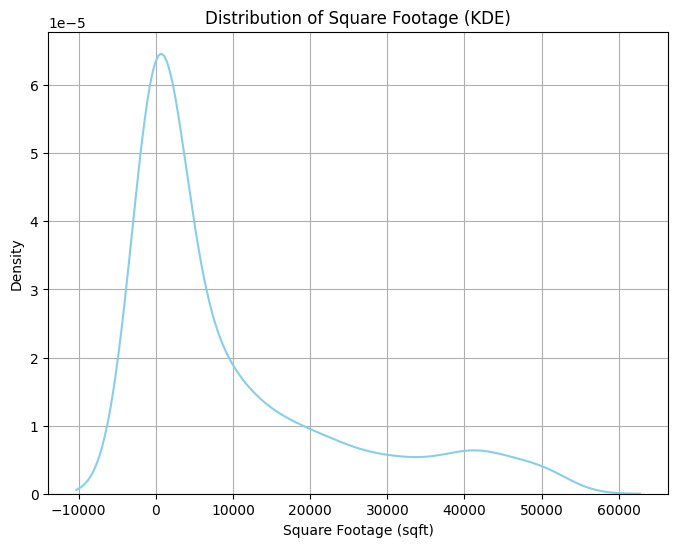

In [ ]:
# Plot a kernel density estimation (KDE) plot
plt.figure(figsize=(8, 6))
sns.kdeplot(limit_office['sqft'], color='skyblue')
plt.xlabel('Square Footage (sqft)')
plt.ylabel('Density')
plt.title('Distribution of Square Footage (KDE)')
plt.grid(True)
plt.show()

In [ ]:
# Calculate point-biserial correlation coefficient and p-value
pb_corr, p_value = pointbiserialr(limit_office['sqft'], limit_office['has_wood_frame'])

print("Point-biserial correlation coefficient:", pb_corr)
print("P-value:", p_value)

Point-biserial correlation coefficient: -0.033913094324257924
P-value: 0.24023987713157988


/tmp/ipykernel_541/1678059970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limit_office['sqft_log'] = np.log(limit_office['sqft'])


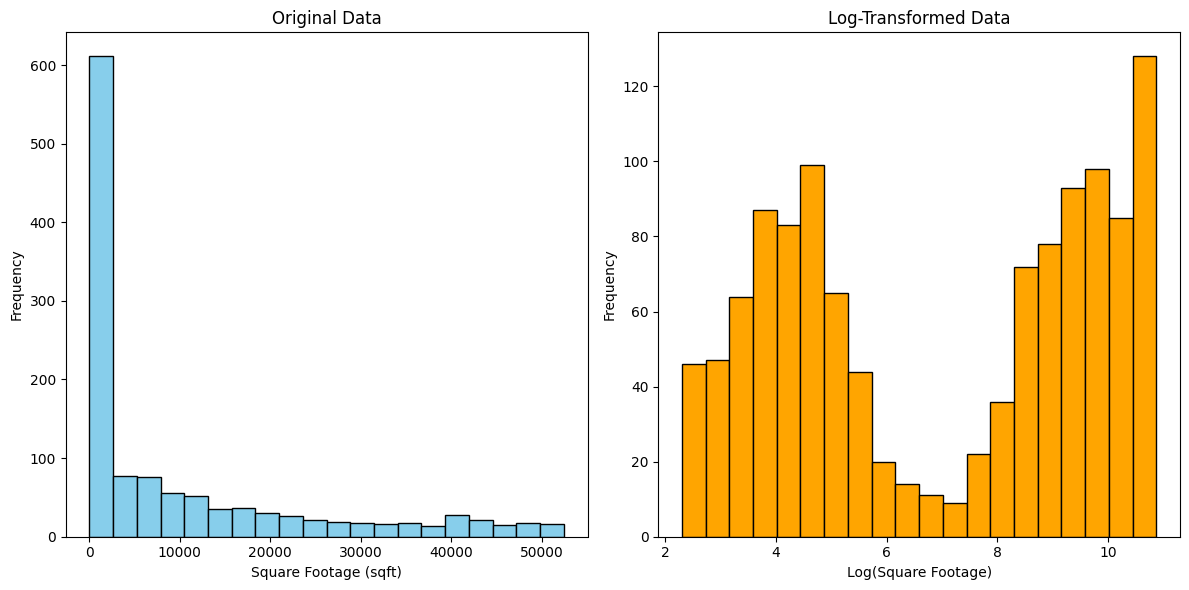

In [ ]:
# log transforming
# Log-transform the 'sqft' column
limit_office['sqft_log'] = np.log(limit_office['sqft'])

# Create a figure and axis object
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original data
axes[0].hist(limit_office['sqft'], bins=20, color='skyblue', edgecolor='black')
axes[0].set_title('Original Data')
axes[0].set_xlabel('Square Footage (sqft)')
axes[0].set_ylabel('Frequency')

# Plot the log-transformed data
axes[1].hist(limit_office['sqft_log'], bins=20, color='orange', edgecolor='black')
axes[1].set_title('Log-Transformed Data')
axes[1].set_xlabel('Log(Square Footage)')
axes[1].set_ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()

In [ ]:
# Calculate point-biserial correlation coefficient and p-value
pb_corr, p_value = pointbiserialr(limit_office['sqft_log'], limit_office['has_wood_frame'])

print("Point-biserial correlation coefficient:", pb_corr)
print("P-value:", p_value)

Point-biserial correlation coefficient: 0.08857228051906899
P-value: 0.0021237652428441286


The correlation is even lower when we focus on the majority of the data. This is a clear indicator that there is very little to no relationship between sqft and wood frame.

### Zipcode (region) and glu-lam

In [ ]:
# Converting region
def regions(x):
    if x == 1:
        return 'NE'
    elif x == 2:
        return 'MW'
    elif x == 3:
        return 'SE'
    elif x == 4:
        return 'SW'
    else:
        return 'W'

In [ ]:
office_df['region'] = office_df['region'].apply(regions)

/tmp/ipykernel_541/3869558004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_df['region'] = office_df['region'].apply(regions)


In [ ]:
# Correlation analysis
# Pearson correlation coefficient calculation
correlation = office_df['region'].corr(office_df['has_glu'])

print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: nan
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/shared-libs/python3.9/py/lib/python3.9/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


### Industrial: Adding concrete_tilt 

The only hypothesis for Industrial properties was Sqft -> Concrete tilt-up, which is not currently in our clean full dataset. We can detect the presence of a concrete tilt-up by checking the two "construction" features.

We expect concrete tilt-up to mainly appear in the wf_vertconst as it is a method that pours concrete into molds and "tilts" them up to create walls.

In [ ]:
# Examining construction values
# print(industrial_df['wf_vertconst'].unique())
# print(industrial_df['wf_horzconst'].unique())

In [ ]:
# Add new column to full that checks whether "tilt-up" is present in construction fields
def check_tilt(row):
    # this regex ensures case insensitivity and also makes the hyphen optional
    if re.search(r'tilt-?up', row['wf_vertconst'], re.IGNORECASE) or re.search(r'tilt-?up', row['wf_horzconst'], re.IGNORECASE):
        return 1
    else: 
        return 0

full_df['has_ctilt'] = full_df.apply(check_tilt, axis=1)
full_df

,Unnamed: 0,project_id,property_type,sqft,zip,region,has_wood_frame,has_vert_wood_frame,has_horz_wood_frame,wf_vertconst,wf_horzconst,has_concrete,has_glu,num_floors,num_tenants,age,property_type_encoded,has_ctilt
0,0,451165,Retail,12808,46123.0,2,0,0,0,"[""Conventional steel framing, isolated CMU, st...","[""No upper floors present""]",1,0,1.0,4.0,NaN,3,0
1,1,350106,Retail,10958,43055.0,2,1,0,1,"[""Concrete masonry unit load bearing walls wit...","[""Wood-framing with wood decking""]",1,0,1.0,1.0,NaN,3,0
2,2,384179,Retail,13,46360.0,2,0,0,0,"[""Steel-framed""]","[""Open-web steel joists with steel decking""]",0,0,1.0,1.0,NaN,3,0
3,3,402102,Retail,82,6902.0,1,0,0,0,"[""Steel-framed""]","[""Steel-framed with steel decking and concrete...",1,0,1.0,1.0,NaN,3,0
4,4,417214,Retail,11204,44062.0,2,0,0,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]",1,0,1.0,1.0,NaN,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5533,5970,618913,Office,59710,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,10.0,NaN,1,0
5534,5971,615825,Office,5650,89523.0,2,0,0,0,"[""Concrete tilt-up perimeter walls""]","[""No upper floors present""]",1,0,1.0,3.0,NaN,1,1
5535,5972,618912,Office,59178,27517.0,3,0,0,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking"", ""Steel-fra...",1,0,3.0,12.0,36.0,1,0
5536,5973,558027,Industrial,10500,95370.0,2,0,0,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]",0,0,1.0,0.0,NaN,0,0


In [ ]:
industrial = full_df[full_df['property_type'] == 'Industrial']
industrial_df = industrial[['project_id', 'sqft', 'has_ctilt', 'wf_vertconst', 'wf_horzconst']]
industrial_df

,project_id,sqft,has_ctilt,wf_vertconst,wf_horzconst
1425,616310,84797,0,"[""Concrete masonry unit load bearing walls wit...","[""No upper floors present""]"
1426,623437,39771,1,"[""Tilt-up concrete walls & CIP columns, steel ...","[""No upper floors present""]"
1427,626489,16036,1,"[""Tilt-up concrete walls & CIP columns, steel ...","[""Conventional wood frame and wood decking ""]"
1428,623423,81325,0,"[""Precast concrete wall panels, steel columns,...","[""No upper floors present""]"
1430,623395,27845,1,"[""Tilt-up concrete walls & CIP columns, steel ...","[""Mezzanine: Steel-framed and metal grating""]"
...,...,...,...,...,...
5530,492119,233280,1,"[""Concrete tilt-up perimeter walls with interi...","[""No upper floors present""]"
5531,599409,13526,0,"[""Concrete masonry unit load bearing walls wit...","[""Steel-framed with steel decking and concrete..."
5532,600426,13800,0,"[""CMU load bearing walls, steel columns, steel...","[""No upper floors present""]"
5536,558027,10500,0,"[""Pre-engineered steel structure""]","[""No upper floors present""]"


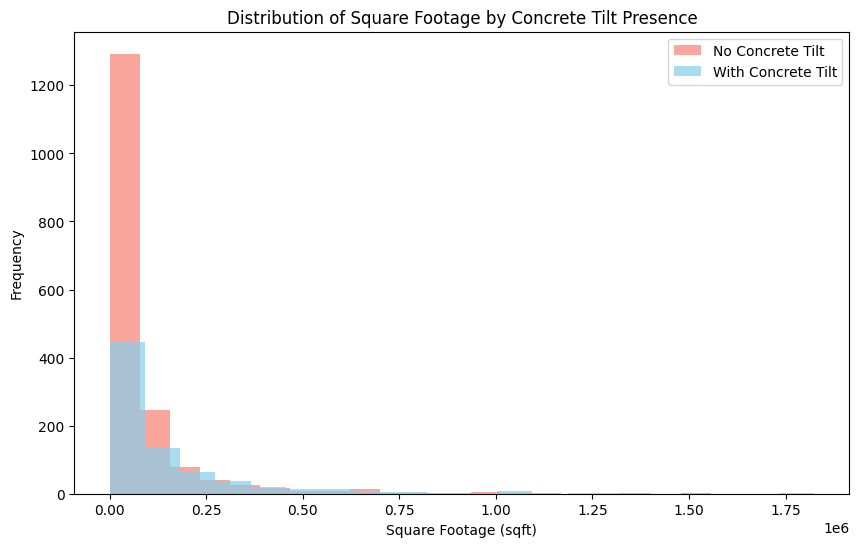

In [ ]:
# What correlation tests can we use?
# First check normality

ctilt_group = industrial_df[industrial_df['has_ctilt'] == 1]
no_ctilt_group = industrial_df[industrial_df['has_ctilt'] == 0]

# Step 2: Plot histograms for each group
plt.figure(figsize=(10, 6))

plt.hist(no_ctilt_group['sqft'], bins=20, color='salmon', alpha=0.7, label='No Concrete Tilt')
plt.hist(ctilt_group['sqft'], bins=20, color='skyblue', alpha=0.7, label='With Concrete Tilt')

plt.xlabel('Square Footage (sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Square Footage by Concrete Tilt Presence')
plt.legend()

plt.show()

In [ ]:
# Again we will use Spearman's rank correlation coefficient since normality is violated within each group: 
#correlation, p_value = (full_df['sqft'], full_df['has_ctilt'])

spearman_corr2 = industrial_df['sqft'].corr(industrial_df['has_ctilt'], method='spearman')

print(f"Spearman's correlation coefficient: ", spearman_corr2)


# alternatively do this using scipy to also get p-value
from scipy.stats import spearmanr

# Calculate Spearman's correlation
correlation, p_value = spearmanr(full_df['sqft'], full_df['has_ctilt'])

print(f"Spearman's correlation coefficient (scipy): {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's correlation coefficient:  0.13781710306553055
Spearman's correlation coefficient (scipy): 0.143
P-value: 0.000


Again, we have a relatively weak correlation between sqft and concrete tilt. We have a low enough p-value that we can reject the null that there is no statistically significant correlation, but due to the small coefficient, this is not very practically significant. (??)

In [ ]:
# limiting sqft to account for skewness
sqft_95th = full_df['sqft'].quantile(0.95)
full_df_limited = full_df[full_df['sqft'] <= sqft_95th]

# try spearman again
correlation, p_value = spearmanr(full_df_limited['sqft'], full_df_limited['has_ctilt'])

print(f"Spearman's correlation coefficient (scipy): {correlation:.3f}")
print(f"P-value: {p_value:.3f}")

Spearman's correlation coefficient (scipy): 0.102
P-value: 0.000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=aa72ad5b-4609-409b-ae7e-8a5fd2e73142' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>